<a href="https://colab.research.google.com/github/ggbaguidi/datascience_base_1/blob/main/EDA/iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
%ls

--2023-04-28 16:47:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2023-04-28 16:47:57 (86.6 MB/s) - ‘iris.data’ saved [4551/4551]

iris.data  sample_data/


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
data = pd.read_csv("iris.data", sep = ',', names=columns)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.duplicated().sum()

3

In [8]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
data[data.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [11]:
data["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<Axes: title={'center': 'Iris dataset species count'}, xlabel='species', ylabel='count'>

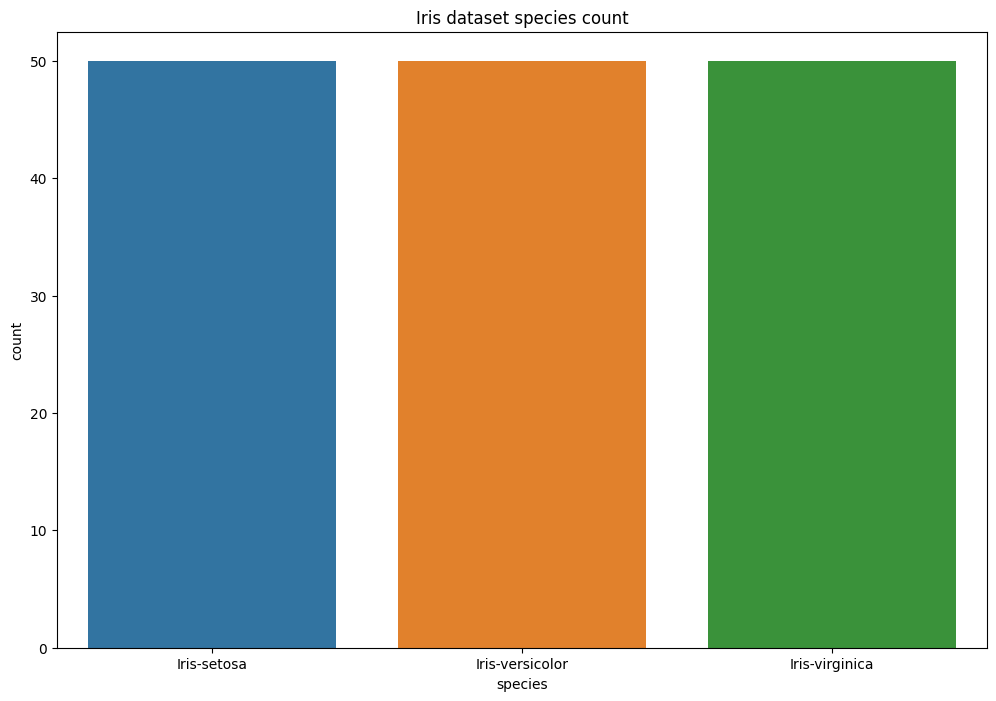

In [12]:
plt.figure(figsize=(12, 8))
plt.title("Iris dataset species count")
sns.countplot(x="species", data=data)

<Figure size 1200x800 with 0 Axes>

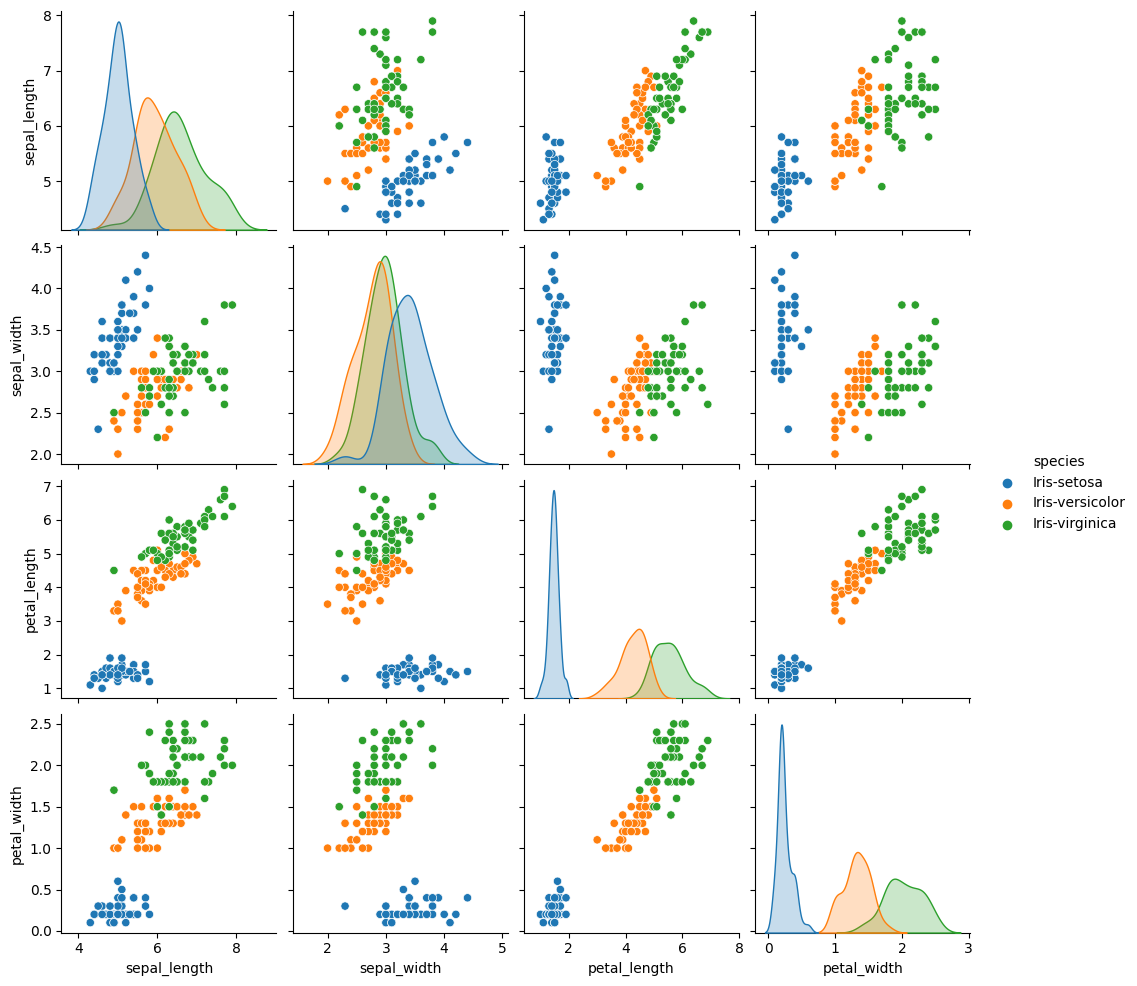

In [13]:
plt.figure(figsize=(12, 8))
sns.pairplot(data=data, hue='species')

<ipython-input-14-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

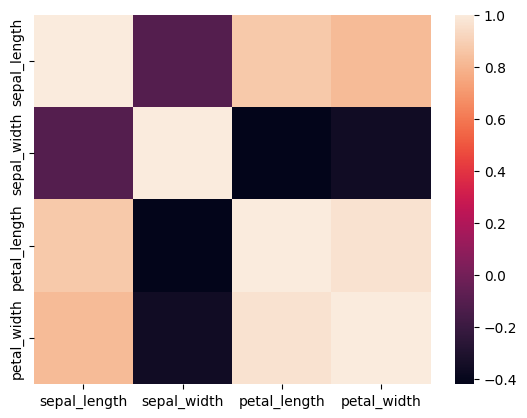

In [14]:
sns.heatmap(data.corr())

In [15]:
data.columns.unique()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

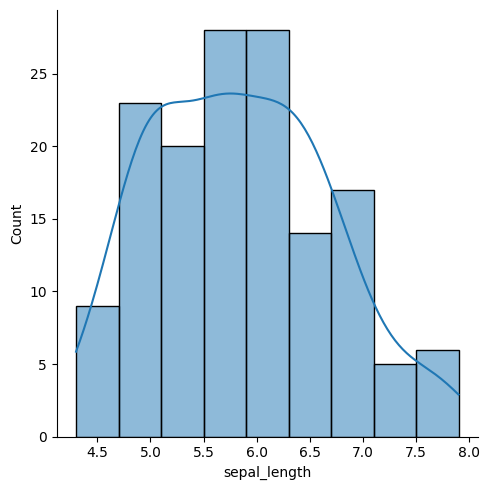

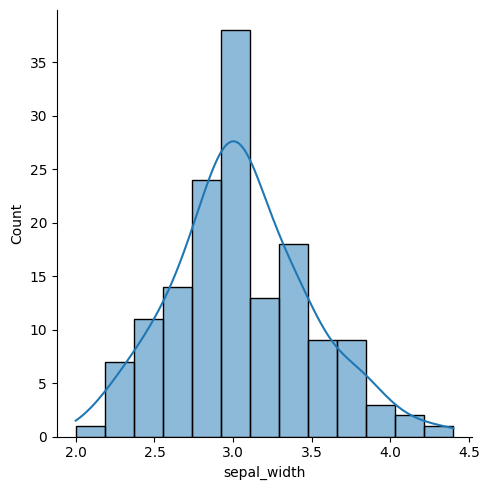

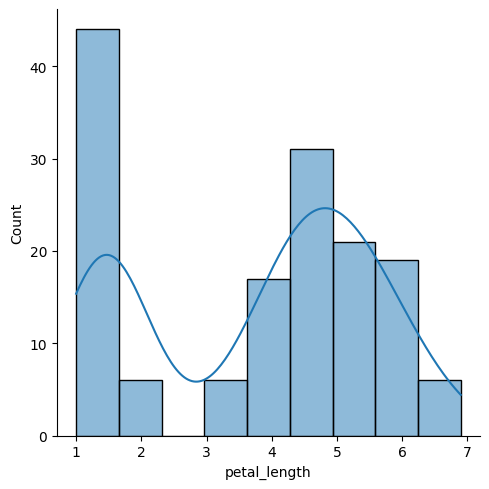

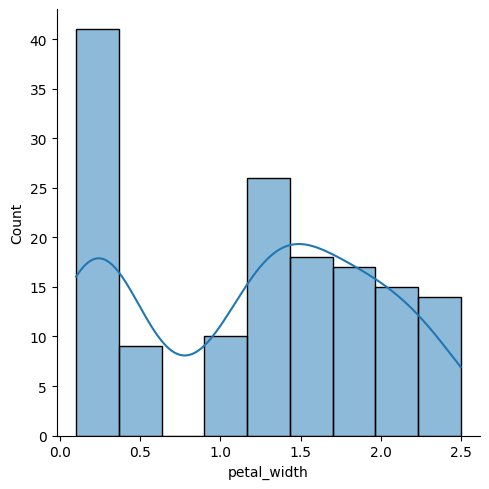

In [18]:
for col_name in data.columns.unique():
  if col_name != "species":
    sns.displot(data[col_name], kde=True)

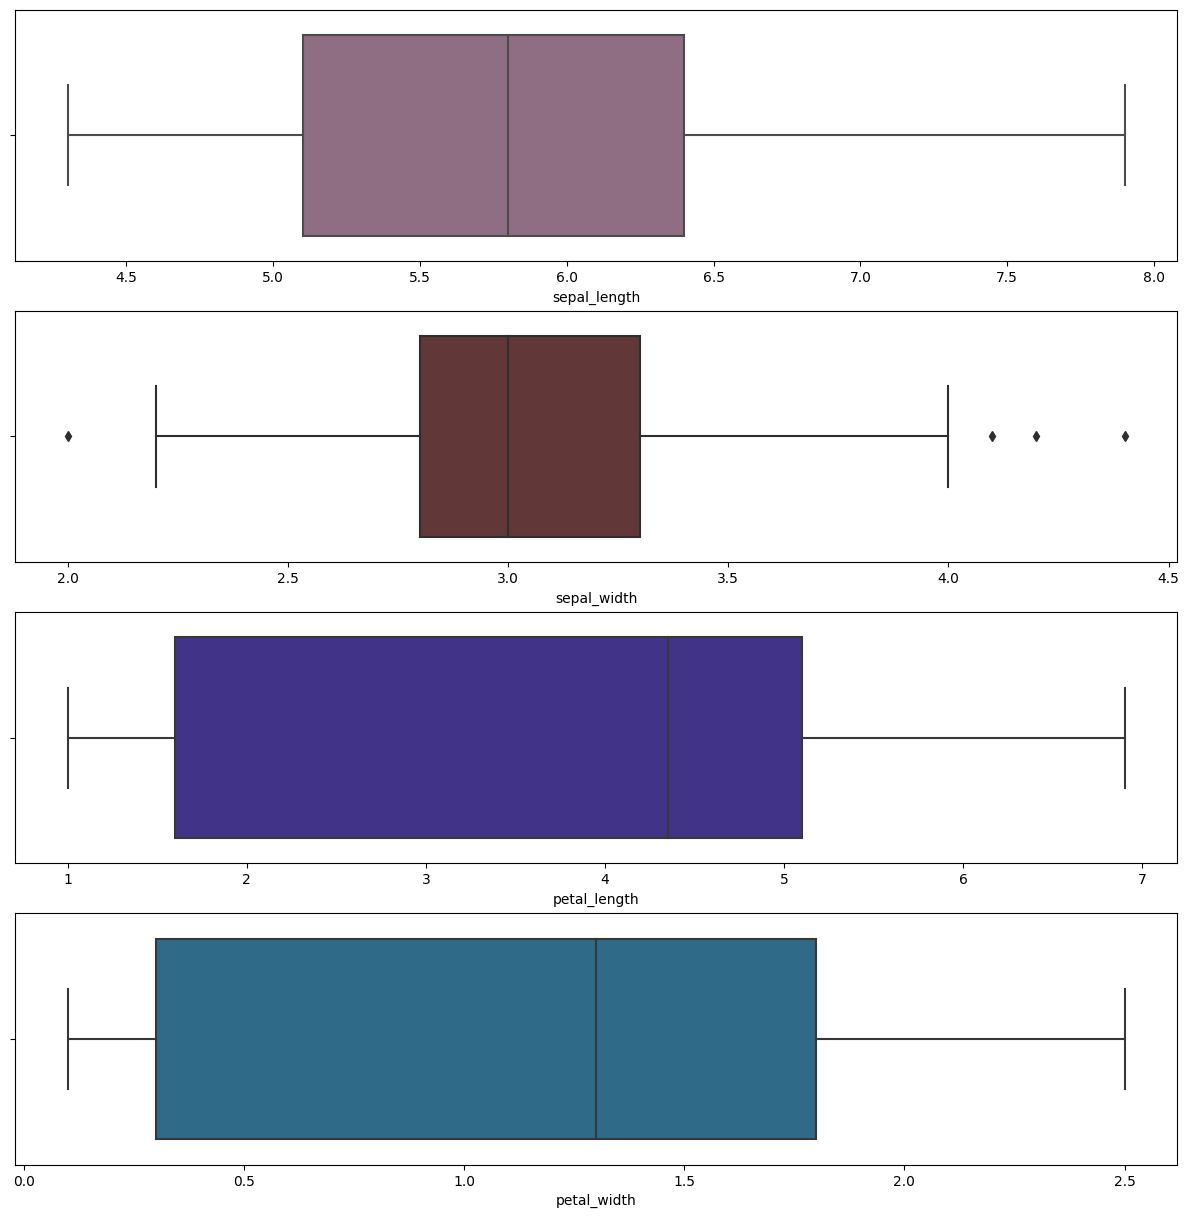

In [31]:
import random
i=0
f, axis = plt.subplots(4, figsize=(15, 15))
for col_name in data.columns.unique():
  color = "#"
  color += str(random.randint(10, 99))
  color += str(random.randint(10, 99))
  color += str(random.randint(10, 99))
  if col_name != "species":
    sns.boxplot(x=col_name, data=data, ax=axis[i], color=color)
    i += 1

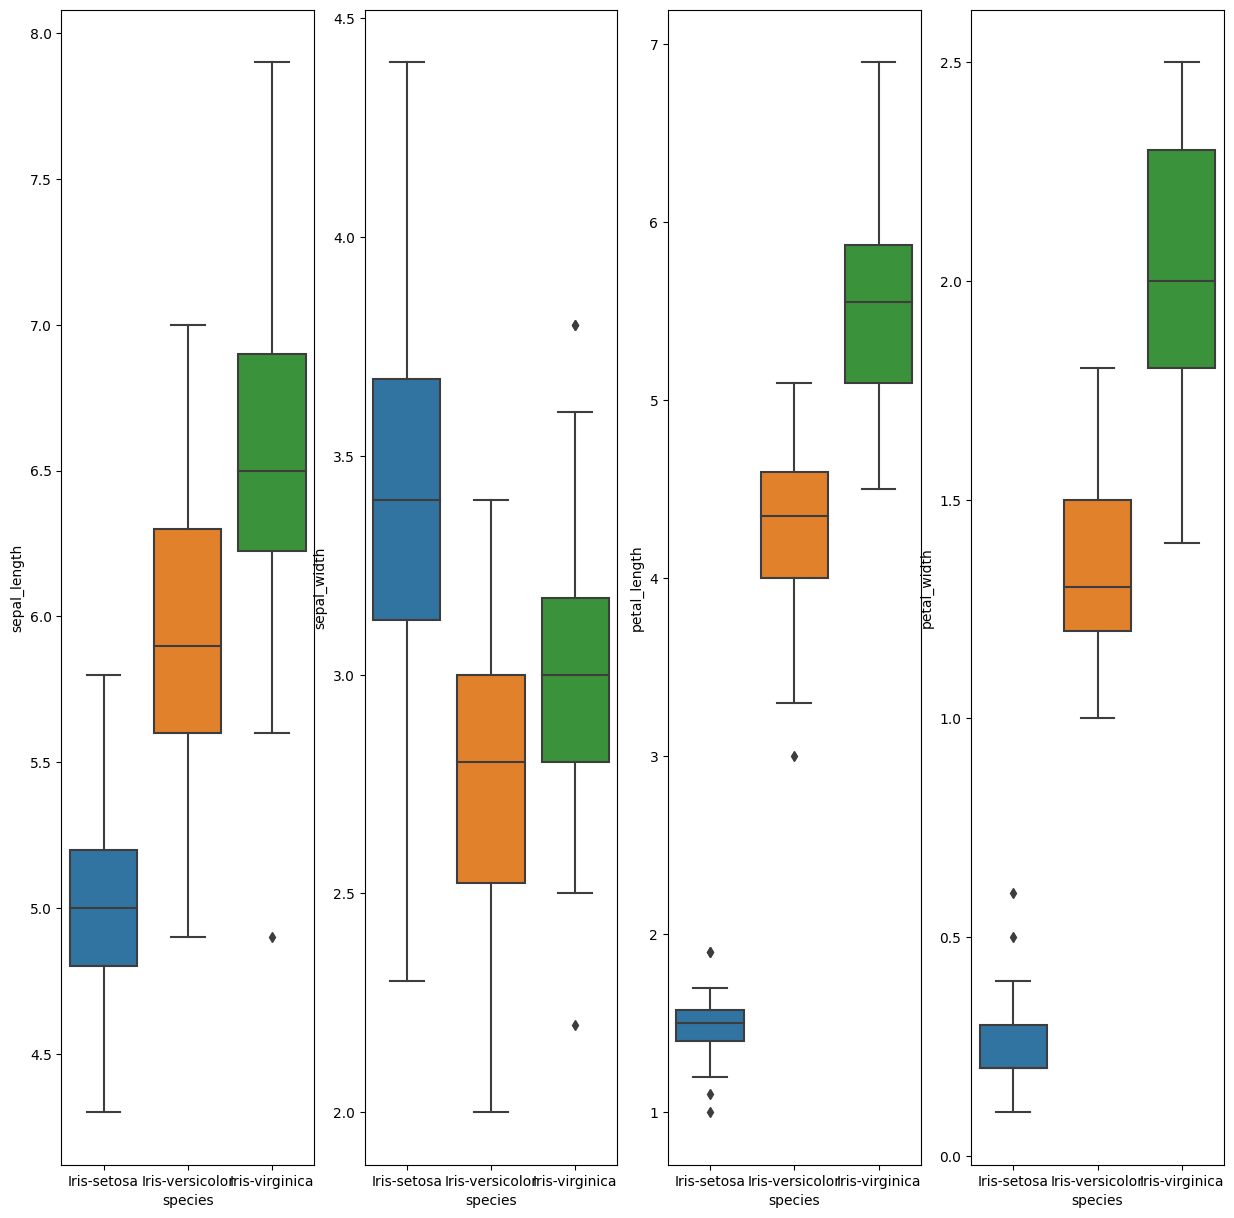

In [33]:
import random
i=0
f, axis = plt.subplots(1, 4, figsize=(15, 15))
for col_name in data.columns.unique():
  if col_name != "species":
    sns.boxplot(x="species", y=col_name, data=data, ax=axis[i])
    i += 1